In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('G_Vu_Vm(1).csv')

In [3]:
df

,Label,Band_0,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,...,Band_214,Band_215,Band_216,Band_217,Band_218,Band_219,Band_220,Band_221,Band_222,Band_223
0,Vm,0.331442,0.389339,0.437765,0.467018,0.482591,0.490016,0.494600,0.497870,0.499295,...,0.441785,0.431369,0.421521,0.408768,0.397029,0.384478,0.371228,0.358885,0.347703,0.347703
1,Vm,0.318035,0.368712,0.410806,0.436835,0.449981,0.458105,0.461014,0.463799,0.464536,...,0.418957,0.411167,0.402508,0.395031,0.382583,0.371304,0.359901,0.348131,0.339341,0.339341
2,Vm,0.320213,0.380593,0.426757,0.458375,0.475469,0.484197,0.488870,0.491599,0.493957,...,0.434338,0.423947,0.414431,0.402013,0.388639,0.376873,0.365196,0.350015,0.340039,0.339814
3,Vm,0.332043,0.389527,0.434977,0.461050,0.475511,0.484103,0.487529,0.490962,0.491945,...,0.433190,0.424777,0.416489,0.405000,0.394599,0.382813,0.370794,0.357239,0.345865,0.345632
4,Vm,0.311934,0.366021,0.406628,0.431635,0.444491,0.451726,0.455980,0.456996,0.459199,...,0.412097,0.404099,0.395085,0.387818,0.378491,0.366534,0.356038,0.346176,0.338082,0.337345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Vu,0.335284,0.378210,0.416439,0.438415,0.450753,0.457326,0.460993,0.463693,0.464803,...,0.408466,0.400790,0.392313,0.384048,0.375902,0.365585,0.355217,0.342683,0.334302,0.334376
100,Vu,0.347518,0.390899,0.421498,0.442408,0.453074,0.458863,0.462544,0.463888,0.465176,...,0.416385,0.408640,0.401013,0.395256,0.386158,0.376086,0.367592,0.356145,0.349912,0.349861
101,Vu,0.323012,0.366948,0.401741,0.425181,0.438595,0.446095,0.448929,0.451130,0.452936,...,0.398267,0.388916,0.380315,0.372619,0.365710,0.353857,0.345474,0.334541,0.325813,0.325768
102,Vu,0.352361,0.396249,0.431029,0.451580,0.462097,0.468358,0.471302,0.473244,0.473474,...,0.420783,0.413140,0.405838,0.397791,0.389058,0.378856,0.368815,0.358235,0.350796,0.350689


/home/lab/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


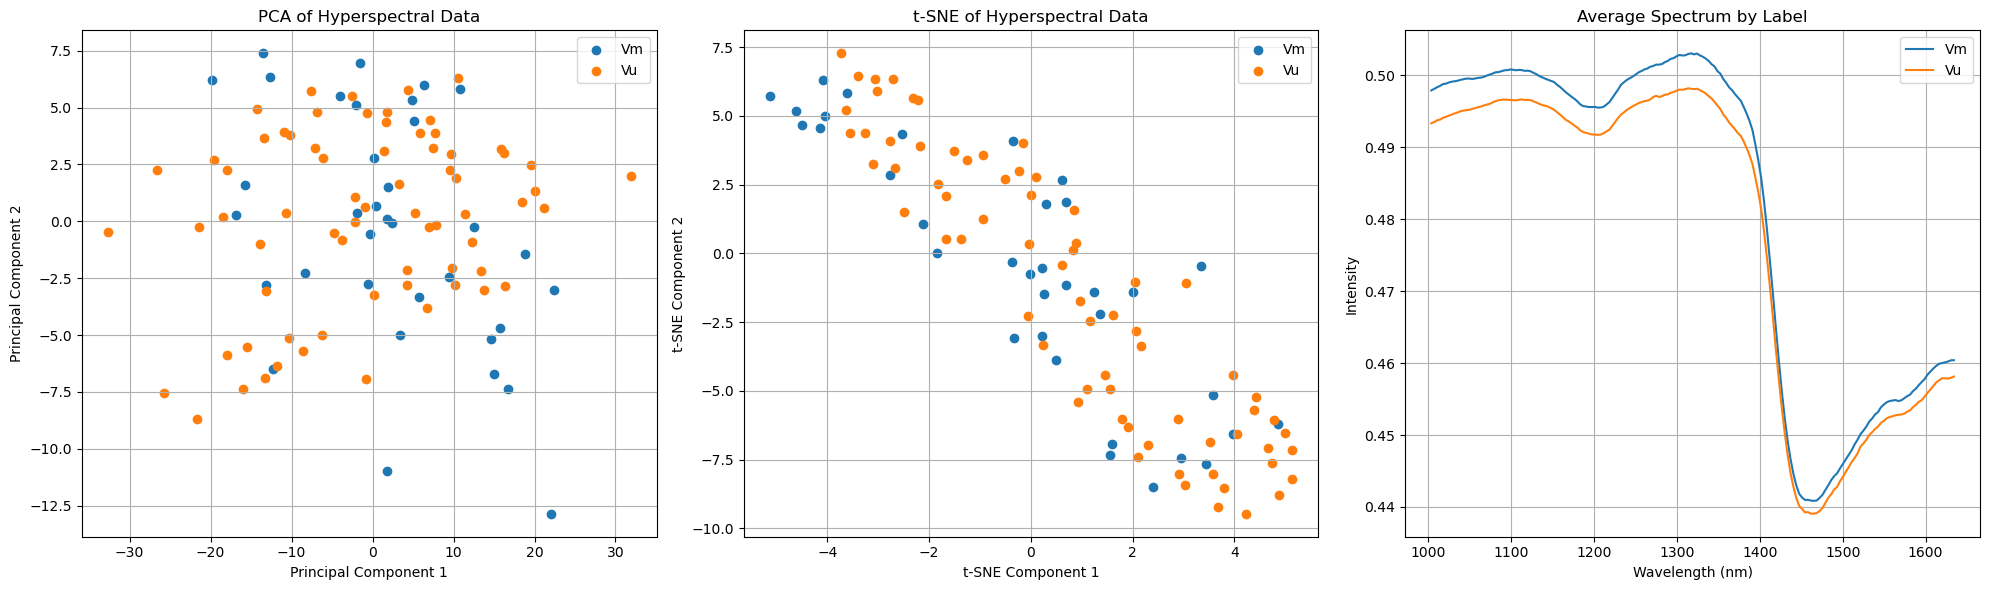

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your CSV file
file_path = 'G_Vu_Vm(1).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features and label
labels = data['Label']
features = data.drop(['Label'], axis=1)

# Exclude first 20 wavelengths and last 24 wavelengths
features = features.iloc[:, 20:-24]

# Adjust the range of wavelengths
wavelengths = np.linspace(1004, 1634, num=features.shape[1])

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)  # Encode to numerical values

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_features = tsne.fit_transform(scaled_features)

# Create a single figure with three plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot PCA colored by labels
for label in np.unique(encoded_labels):
    axes[0].scatter(
        pca_features[encoded_labels == label, 0],
        pca_features[encoded_labels == label, 1],
        label=label_encoder.inverse_transform([label])[0]
    )
axes[0].set_title('PCA of Hyperspectral Data')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend()
axes[0].grid()

# Plot t-SNE colored by labels
for label in np.unique(encoded_labels):
    axes[1].scatter(
        tsne_features[encoded_labels == label, 0],
        tsne_features[encoded_labels == label, 1],
        label=label_encoder.inverse_transform([label])[0]
    )
axes[1].set_title('t-SNE of Hyperspectral Data')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')
axes[1].legend()
axes[1].grid()

# Calculate and plot average spectrum for each label
average_spectra = data.groupby('Label').mean()

# Drop irrelevant columns
average_spectra = average_spectra.iloc[:, 20:-24]

# Plot the spectrum with updated wavelength range
for label in average_spectra.index:
    axes[2].plot(
        wavelengths,  # Use adjusted wavelengths
        average_spectra.loc[label],
        label=label
    )
axes[2].set_title('Average Spectrum by Label')
axes[2].set_xlabel('Wavelength (nm)')
axes[2].set_ylabel('Intensity')
axes[2].legend()
axes[2].grid()

# Adjust layout and save to a single image file
plt.tight_layout()
plt.savefig('output_image_with_correct_wavelengths.png')
plt.show()


       Model  Accuracy  Balanced Accuracy       AUC
0        MLP  0.824545           0.800000  0.833333
1         RF  0.666364           0.569048  0.660714
2        SVM  0.693636           0.545833  0.660714
3        GBM  0.713636           0.649405  0.694643
4   AdaBoost  0.685455           0.602381  0.635714
5         LR  0.748182           0.675595  0.751190
6        PLS  0.674545           0.516667  0.560714
7  Consensus  0.740000           0.617857  0.811310


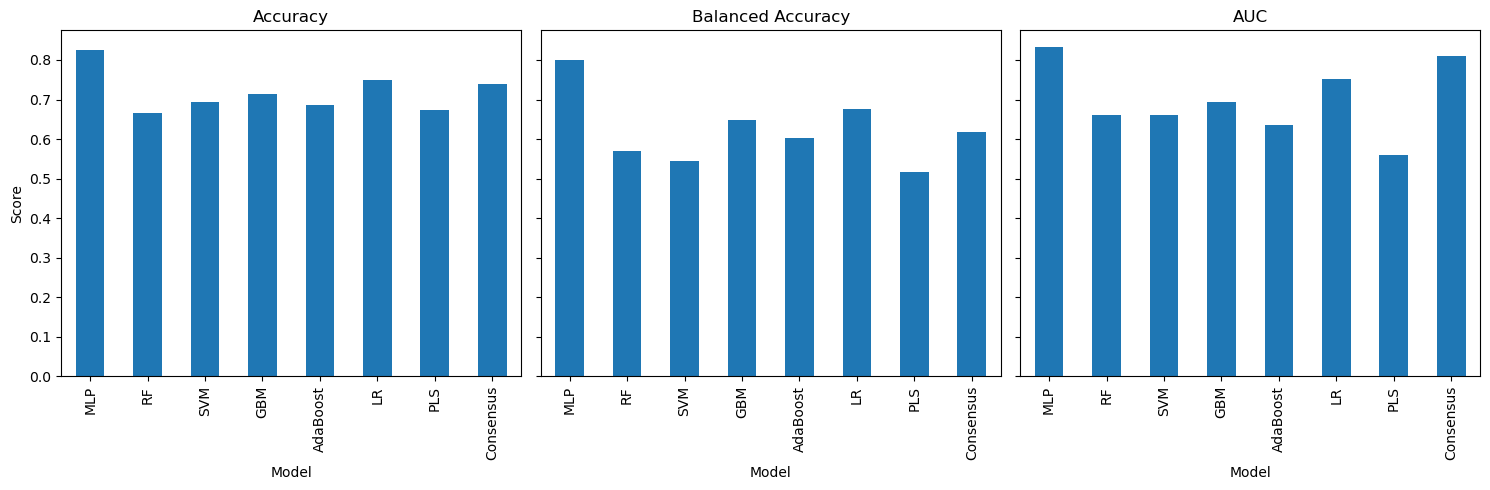

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your CSV file
file_path = 'G_Vu_Vm(1).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features and label
labels = data['Label']
features = data.drop(['Label'], axis=1)

# Exclude first 20 wavelengths and last 24 wavelengths
features = features.iloc[:, 20:-24]

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)  # Encode to numerical values

# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Set up 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Models to evaluate
models = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "RF": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "GBM": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "LR": LogisticRegression(max_iter=1000, random_state=42),
    "PLS": PLSRegression(n_components=2)
}

# Initialize metrics dictionary
metrics = {
    "Model": [],
    "Accuracy": [],
    "Balanced Accuracy": [],
    "AUC": []
}

# Perform cross-validation for each model
for model_name, model in models.items():
    accuracies = []
    balanced_accuracies = []
    auc_scores = []

    for train_index, test_index in kf.split(features, labels):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        # Train model
        if model_name == "PLS":
            model.fit(X_train, y_train)
            y_pred = np.round(model.predict(X_test)).astype(int)
            y_prob = model.predict(X_test)  # Use continuous outputs for AUC
            auc = roc_auc_score(y_test, y_prob) if len(label_encoder.classes_) == 2 else np.nan
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1] if len(label_encoder.classes_) == 2 else None
            auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        balanced_acc = balanced_accuracy_score(y_test, y_pred)

        accuracies.append(acc)
        balanced_accuracies.append(balanced_acc)
        auc_scores.append(auc)

    # Store metrics
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(np.mean(accuracies))
    metrics["Balanced Accuracy"].append(np.mean(balanced_accuracies))
    metrics["AUC"].append(np.mean(auc_scores) if not np.isnan(auc_scores).all() else np.nan)

# Consensus (average of model predictions)
accuracies = []
balanced_accuracies = []
auc_scores = []

for train_index, test_index in kf.split(features, labels):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    consensus_preds = np.zeros((len(y_test), len(models)))
    consensus_probs = np.zeros((len(y_test), len(models)))

    for i, (model_name, model) in enumerate(models.items()):
        if model_name == "PLS":
            model.fit(X_train, y_train)
            consensus_preds[:, i] = np.round(model.predict(X_test)).astype(int)
            consensus_probs[:, i] = model.predict(X_test)  # Continuous predictions
        else:
            model.fit(X_train, y_train)
            consensus_preds[:, i] = model.predict(X_test)
            if len(label_encoder.classes_) == 2:
                consensus_probs[:, i] = model.predict_proba(X_test)[:, 1]

    y_pred = np.round(consensus_preds.mean(axis=1)).astype(int)
    y_prob = consensus_probs.mean(axis=1) if len(label_encoder.classes_) == 2 else None

    acc = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    accuracies.append(acc)
    balanced_accuracies.append(balanced_acc)
    auc_scores.append(auc)

metrics["Model"].append("Consensus")
metrics["Accuracy"].append(np.mean(accuracies))
metrics["Balanced Accuracy"].append(np.mean(balanced_accuracies))
metrics["AUC"].append(np.mean(auc_scores) if not np.isnan(auc_scores).all() else np.nan)

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Print metrics table
print(metrics_df)

# Plot bar graphs for metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

metrics_df.set_index("Model")[["Accuracy"]].plot(kind="bar", ax=axes[0], title="Accuracy", legend=False)
metrics_df.set_index("Model")[["Balanced Accuracy"]].plot(kind="bar", ax=axes[1], title="Balanced Accuracy", legend=False)
metrics_df.set_index("Model")[["AUC"]].plot(kind="bar", ax=axes[2], title="AUC", legend=False)

for ax in axes:
    ax.set_ylabel("Score")
    ax.set_xlabel("Model")

plt.tight_layout()
plt.show()


In [8]:
pip install captum torch


  Obtaining dependency information for captum from https://files.pythonhosted.org/packages/e1/76/b21bfd2c35cab2e9a4b68b1977f7488c246c8cffa31e3361ee7610e8b5af/captum-0.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/d1/35/e8b2daf02ce933e4518e6f5682c72fd0ed66c15910ea1fb4168f442b71c4/torch-2.5.1-cp311-cp311-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for nvidia-cuda-nvrtc-cu12==12.4.127 from https://files.pythonhosted.org/packages/2c/14/91ae57cd4db3f9ef7aa99f4019cfa8d54cb4caa7e00975df6467e9725a9f/nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for nvidia-cuda-runtime-cu12==12.4.127 from https://files.pythonhosted

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB ? eta 0:00:00 MB/s eta 0:00:010:00:02�━━━━━━━━━━╸ 906.5/906.5 MB 19.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 481.7 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 11.9 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 7.8 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 10.3 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB ? eta 0:00:00MB/s eta 0:00:01m0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 614.8 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 2.9 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 905.5 kB/s

Top 5 Wavelengths with Highest Importance:
Wavelength: 1595.28 nm, Importance: 1.0000
Wavelength: 1591.77 nm, Importance: 0.9657
Wavelength: 1232.77 nm, Importance: 0.9604
Wavelength: 1433.39 nm, Importance: 0.9435
Wavelength: 1236.29 nm, Importance: 0.9086


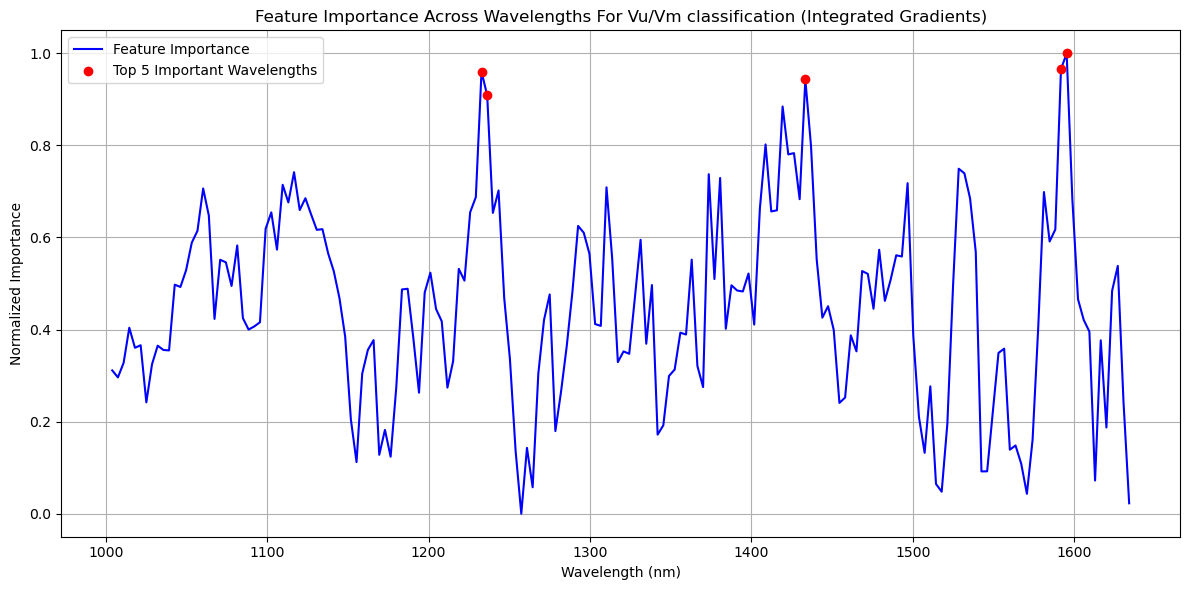

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from captum.attr import IntegratedGradients

# Load the dataset
file_path = 'G_Vu_Vm(1).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features and label
labels = data['Label']
features = data.drop(['Label'], axis=1)

# Exclude first 20 wavelengths and last 24 wavelengths
features = features.iloc[:, 20:-24]

# Define wavelength range
original_wavelengths = np.linspace(1004, 1634, num=features.shape[1])

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(features_scaled, dtype=torch.float32)
y_tensor = torch.tensor(encoded_labels, dtype=torch.long)

# Train an MLP classifier on the entire dataset
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(features_scaled, encoded_labels)

# Convert the trained weights to PyTorch
class TorchMLP(torch.nn.Module):
    def __init__(self, sk_mlp):
        super(TorchMLP, self).__init__()
        self.hidden = torch.nn.Sequential(
            torch.nn.Linear(features_scaled.shape[1], 100),
            torch.nn.ReLU(),
            torch.nn.Linear(100, len(np.unique(encoded_labels)))
        )
        # Set weights and biases
        self.hidden[0].weight.data = torch.tensor(sk_mlp.coefs_[0].T, dtype=torch.float32)
        self.hidden[0].bias.data = torch.tensor(sk_mlp.intercepts_[0], dtype=torch.float32)
        self.hidden[2].weight.data = torch.tensor(sk_mlp.coefs_[1].T, dtype=torch.float32)
        self.hidden[2].bias.data = torch.tensor(sk_mlp.intercepts_[1], dtype=torch.float32)

    def forward(self, x):
        return self.hidden(x)

# Convert scikit-learn MLP to PyTorch
torch_mlp = TorchMLP(mlp)
torch_mlp.eval()

# Integrated Gradients
ig = IntegratedGradients(torch_mlp)

# Calculate attributions for the entire dataset
attributions, delta = ig.attribute(
    X_tensor, target=0, return_convergence_delta=True
)  # target=0 assumes binary classification (class 0)

# Convert attributions to numpy array
attributions_np = attributions.detach().numpy().mean(axis=0)

# Normalize attributions
normalized_attributions = (attributions_np - np.min(attributions_np)) / (np.max(attributions_np) - np.min(attributions_np))

# Identify the top 5 wavelengths with the highest importance
top_5_indices = np.argsort(-normalized_attributions)[:5]
top_5_wavelengths = original_wavelengths[top_5_indices]
top_5_importances = normalized_attributions[top_5_indices]

# Print the top 5 wavelengths and their importance
print("Top 5 Wavelengths with Highest Importance:")
for i in range(5):
    print(f"Wavelength: {top_5_wavelengths[i]:.2f} nm, Importance: {top_5_importances[i]:.4f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(original_wavelengths, normalized_attributions, color="blue", label="Feature Importance")

# Highlight the top 5 wavelengths on the plot without annotation
plt.scatter(top_5_wavelengths, top_5_importances, color="red", label="Top 5 Important Wavelengths", zorder=5)

plt.title("Feature Importance Across Wavelengths For Vu/Vm classification (Integrated Gradients)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Importance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("feature_importance_with_top5_integrated_gradients_no_annotation.png")
plt.show()
